In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
idp_dir = "/home/nikhil/projects/Parkinsons/nimhans/data/ylo/derivatives/dmri-freewater/2.0.0/idp/"

syn_idp = f"{idp_dir}/sub-YLOPD31_ses-01_qsiprep-fw-2.0.0_JHU-ICBM-labels-1mm_syn_idp.tsv"
aff_idp = f"{idp_dir}/sub-YLOPD31_ses-01_qsiprep-fw-2.0.0_JHU-ICBM-labels-1mm_affine_idp.tsv"

In [ ]:
syn_idp_df = pd.read_csv(syn_idp, sep="\t")
aff_idp_df = pd.read_csv(aff_idp, sep="\t")

idp_df = pd.concat([aff_idp_df,syn_idp_df], axis=0)

idp_df.head()

,roi_idx,model,param,mean_value,participant_id,pipeline,software,shell,registration,roi_name
0,0,dti,fa,0.051680,sub-YLOPD31,qsiprep-fw-2.0.0,dipy,multi-shell,syn_bkup,Unclassified
1,1,dti,fa,0.473392,sub-YLOPD31,qsiprep-fw-2.0.0,dipy,multi-shell,syn_bkup,Middle cerebellar peduncle
2,2,dti,fa,0.428412,sub-YLOPD31,qsiprep-fw-2.0.0,dipy,multi-shell,syn_bkup,Pontine crossing tract (a part of MCP)
3,3,dti,fa,0.579941,sub-YLOPD31,qsiprep-fw-2.0.0,dipy,multi-shell,syn_bkup,Genu of corpus callosum
4,4,dti,fa,0.625226,sub-YLOPD31,qsiprep-fw-2.0.0,dipy,multi-shell,syn_bkup,Body of corpus callosum


### Plot metrics comparing reg methods


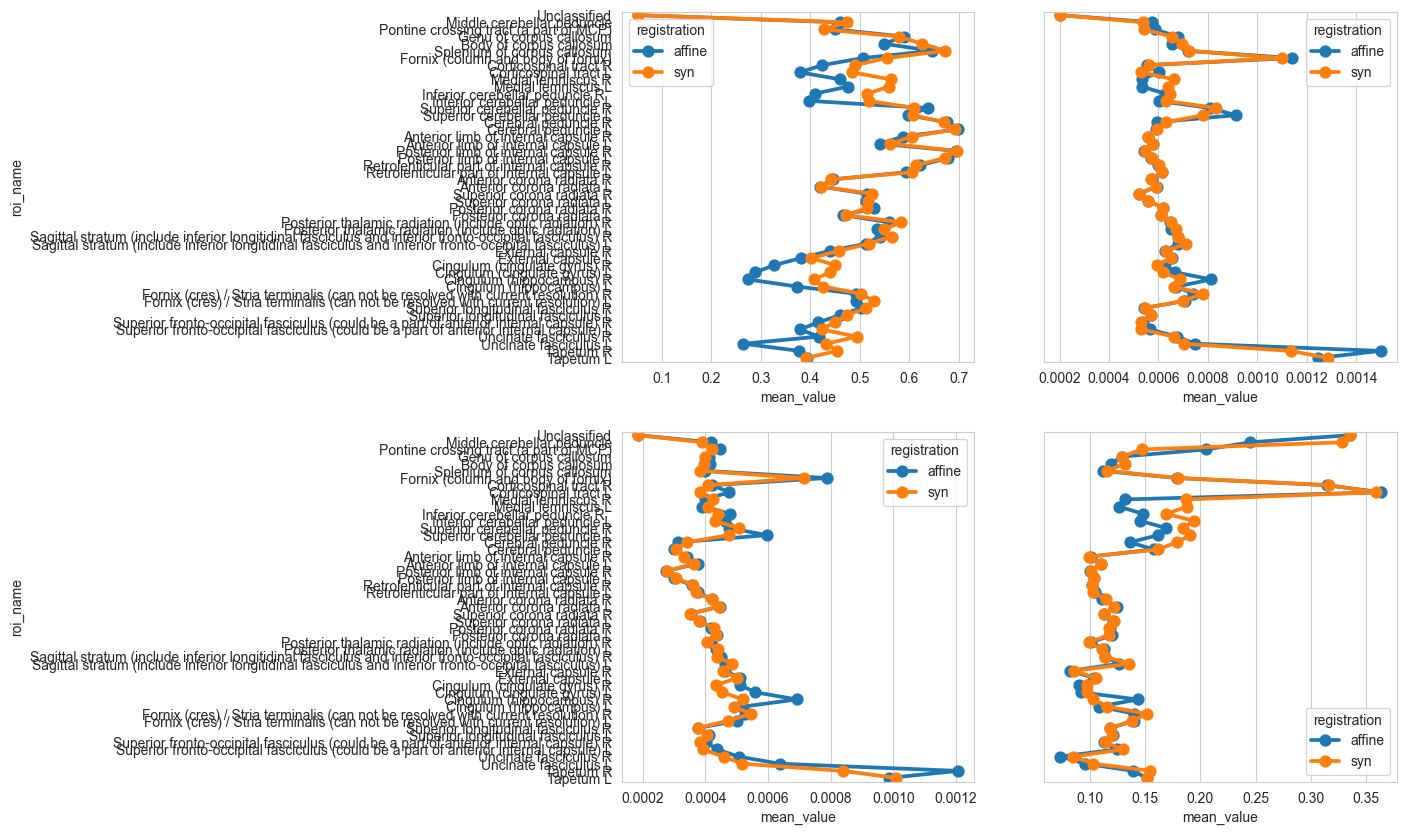

In [ ]:

sns.set_style("whitegrid")

# Create a figure and a set of subplots
fig, axes = plt.subplots(nrows=2, ncols=2, figsize=(10, 10), sharex=False,sharey=True)

param_list = ["fa","md","ad","nrmse"]

for i, ax in enumerate(axes.flatten()):
    plot_df = idp_df[idp_df["param"] == param_list[i]].copy()
    sns.pointplot(y= "roi_name", x="mean_value", hue="registration", ax=ax,
                data=plot_df)